In [1]:
import json
import pandas as pd
import numpy as np
import plotly as py

In [2]:
df2 = pd.read_json('business_train.json',orient = 'records',lines = True)

In [3]:
ind=[]
cate=df2["categories"].tolist()
for i in range(len(cate)):
    if cate[i]==None:
        continue
    if ("Chinese" in cate[i])|("Thai" in cate[i])|("Japanese" in cate[i])|("Asian" in cate[i])|("Korean" in cate[i]):
        continue
    if ("Brunch" in cate[i])|("Breakfast" in cate[i]):
        ind.append(i)

In [4]:
dfbrunch=df2.iloc[ind]

In [5]:
dfbrunch.index = list(range(len(dfbrunch)))

In [6]:
stars = pd.read_csv('brunch.csv')
stars = stars[['business_id','stars']]

/Users/jiangyunwen/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning:

Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.



In [7]:
train = stars.groupby(['business_id'])['stars'].agg('mean')

In [8]:
train_new = train.reset_index()[['business_id']]
train_new = train_new.merge(train.reset_index(), suffixes=["", ""], how='left', on=['business_id'])

In [9]:
train_new = train_new.merge(dfbrunch,how = 'left', on = ['business_id'])

In [10]:
train1 = train_new[['business_id','stars','attributes']]

In [11]:
train1.head()

,business_id,stars,attributes
0,133.0,2.944444,"{'BusinessParking': '{'garage': False, 'street..."
1,147.0,4.163121,"{'OutdoorSeating': 'False', 'RestaurantsPriceR..."
2,218.0,4.578512,"{'BikeParking': 'True', 'HasTV': 'False', 'Res..."
3,225.0,3.750000,"{'RestaurantsTakeOut': 'True', 'RestaurantsRes..."
4,469.0,3.620690,"{'BikeParking': 'True', 'RestaurantsDelivery':..."


In [18]:
attribute = ['AcceptsInsurance', 'Alcohol', 'Ambience', 'BYOB','BYOBCorkage', 'BestNights', 'BikeParking','BusinessAcceptsBitcoin',
                 'BusinessAcceptsCreditCards','BusinessParking', 'ByAppointmentOnly', 'Caters', 'CoatCheck','Corkage', 'DietaryRestrictions', 
                'DogsAllowed', 'DriveThru', 'GoodForDancing', 'GoodForKids', 'GoodForMeal', 'HappyHour','HasTV', 'Music', 'NoiseLevel', 
                'Open24Hours', 'OutdoorSeating', 'RestaurantsAttire','RestaurantsCounterService', 'RestaurantsDelivery', 'RestaurantsGoodForGroups',
                'RestaurantsPriceRange2', 'RestaurantsReservations', 'RestaurantsTableService', 'RestaurantsTakeOut', 'Smoking',
                'WheelchairAccessible', 'WiFi']

In [224]:
features = []
for i in range(len(train1)):
    if train1['attributes'][i] != None:
        item = []
        item.append(train1['business_id'][i])
        item.append(train1['stars'][i])
        for j in range(len(attribute)):
            if attribute[j] not in train1['attributes'][i].keys():
                item.append('None')      #missing values :'None'
            else:
                key = attribute[j]
                item.append(str(train1['attributes'][i][key]))
        features.append(item)

In [225]:
feature = pd.DataFrame(features,columns = ['business_id','stars','AcceptsInsurance', 'Alcohol', 'Ambience', 'BYOB','BYOBCorkage', 'BestNights', 'BikeParking','BusinessAcceptsBitcoin',
                 'BusinessAcceptsCreditCards','BusinessParking', 'ByAppointmentOnly', 'Caters', 'CoatCheck','Corkage', 'DietaryRestrictions', 
                'DogsAllowed', 'DriveThru', 'GoodForDancing', 'GoodForKids', 'GoodForMeal', 'HappyHour','HasTV', 'Music', 'NoiseLevel', 
                'Open24Hours', 'OutdoorSeating', 'RestaurantsAttire','RestaurantsCounterService', 'RestaurantsDelivery', 'RestaurantsGoodForGroups',
                'RestaurantsPriceRange2', 'RestaurantsReservations', 'RestaurantsTableService', 'RestaurantsTakeOut', 'Smoking',
                'WheelchairAccessible', 'WiFi'])

In [226]:
feature.RestaurantsAttire.value_counts()

u'casual'    2081
'casual'     1584
None          550
u'dressy'      34
'dressy'       19
'formal'        4
Name: RestaurantsAttire, dtype: int64

In [227]:
len(feature)

4272

In [228]:
#delete 80% missing
#AcceptsInsurance 4271/4272 missing
#Ambience
#BYOB 4270/4272
#BYOBCorkage 4168/4272
#BestNights' 4038/4272
#BusinessAcceptsBitcoin 3849/4272
#ByAppointmentOnly 4191/4272
#CoatCheck 4004/4272
#Corkage 4216/4272
#DietaryRestrictions 4267/4272
#DogsAllowed 3759/4272
#DriveThru 4005/4272
#GoodForDancing 3938/4272
#HappyHour 3941/4272
#GoodForMeal (breakfast/brunch)
#Music 3927/4272
#Open24Hours 4270/4272
#RestaurantsCounterService 4270/4272
#Smoking 4016/4272
#WheelchairAccessible

In [229]:
#Alcohol None:0, none:1, beer_and_wine:2, full_bar:3,
import warnings
warnings.filterwarnings('ignore')
for i in range(len(feature)):
    if feature.Alcohol[i] == 'None':
        feature.Alcohol[i] = 0
    if feature.Alcohol[i] == "u'none'" or feature.Alcohol[i] == "'none'":
        feature.Alcohol[i] = 1
    if feature.Alcohol[i] == "u'beer_and_wine'" or feature.Alcohol[i] == "'beer_and_wine'":
        feature.Alcohol[i] = 2
    if feature.Alcohol[i] == "u'full_bar'" or feature.Alcohol[i] == "'full_bar'":
        feature.Alcohol[i] = 3

In [230]:
#Ambience:  expand to 9 attributes and delete Ambience
ambience = ['romantic','intimate','classy','hipster','divey','touristy','trendy','upscale','casual']
romantic,intimate,classy,hipster,divey,touristy,trendy,upscale,casual = [],[],[],[],[],[],[],[],[]
for i in range(len(feature)):
    if feature.Ambience[i] == 'None':
        romantic.append('None')
        intimate.append('None')
        classy.append('None')
        hipster.append('None')
        divey.append('None')
        touristy.append('None')
        trendy.append('None')
        upscale.append('None')
        casual.append('None')
    else:
        d = eval(feature.Ambience[i])
        romantic.append(str(d['romantic']))
        intimate.append(str(d['intimate']))
        classy.append(str(d['classy']))
        if 'hipster' in d.keys():
            hipster.append(str(d['hipster']))
        else:
            hipster.append('None')
        if 'divey' in d.keys():
            divey.append(str(d['divey']))
        else:
            divey.append('None')
        touristy.append(str(d['touristy']))
        trendy.append(str(d['trendy']))
        if 'upscale' in d.keys():
            upscale.append(str(d['upscale']))
        else:
            upscale.append('None')
        casual.append(str(d['casual']))

In [231]:
Ambience = pd.DataFrame({'romantic':romantic, 'intimate':intimate, 'classy':classy, 'hipster':hipster,
                                       'divey':divey,'touristy':touristy,'trendy':trendy,'upscale':upscale,'casual':casual})
feature = feature.join(Ambience)

In [232]:
for i in range(len(feature)):
    if feature.BusinessParking[i] != 'None':
        if 'True' in feature.BusinessParking[i]:
            feature.BusinessParking[i] = 'True'
        else:
            feature.BusinessParking[i] = 'False' 

In [233]:
for i in range(len(feature)):
    if feature.NoiseLevel[i] == "u'average'" or feature.NoiseLevel[i] == "'average'":
        feature.NoiseLevel[i] = 'average'
    if feature.NoiseLevel[i] == "u'quiet'" or feature.NoiseLevel[i] == "'quiet'":
        feature.NoiseLevel[i] = 'quiet'
    if feature.NoiseLevel[i] == "u'loud'" or feature.NoiseLevel[i] == "'loud'":
        feature.NoiseLevel[i] = 'loud'
    if feature.NoiseLevel[i] == "u'very_loud'" or feature.NoiseLevel[i] == "'very_loud'":
        feature.NoiseLevel[i] = 'very_loud'       

In [234]:
for i in range(len(feature)):
    if feature.RestaurantsAttire[i] == "u'casual'" or feature.RestaurantsAttire[i] == "'casual'":
        feature.RestaurantsAttire[i] = 'casual'
    if feature.RestaurantsAttire[i] == "u'dressy'" or feature.RestaurantsAttire[i] == "'dressy'":
        feature.RestaurantsAttire[i] = 'dressy'
    if feature.RestaurantsAttire[i] == "'formal'":
        feature.RestaurantsAttire[i] = 'formal'

In [235]:
for i in range(len(feature)):
    if feature.WiFi[i] == "u'free'" or feature.WiFi[i] == "'free'":
        feature.WiFi[i] = 'free'
    if feature.WiFi[i] == "u'no'" or feature.WiFi[i] == "'no'":
        feature.WiFi[i] = 'no'
    if feature.WiFi[i] == "u'paid'" or feature.WiFi[i] == "'paid'":
        feature.WiFi[i] = 'paid'

In [236]:
feature.head()

,business_id,stars,AcceptsInsurance,Alcohol,Ambience,BYOB,BYOBCorkage,BestNights,BikeParking,BusinessAcceptsBitcoin,...,WiFi,romantic,intimate,classy,hipster,divey,touristy,trendy,upscale,casual
0,133.0,2.944444,None,1,"{'romantic': False, 'intimate': False, 'classy...",None,None,None,False,None,...,free,False,False,False,False,False,False,False,False,False
1,147.0,4.163121,None,3,"{'romantic': False, 'intimate': False, 'touris...",None,None,"{'monday': False, 'tuesday': False, 'friday': ...",True,None,...,free,False,False,False,False,True,False,False,False,False
2,218.0,4.578512,None,1,"{'romantic': False, 'intimate': False, 'classy...",None,None,None,True,False,...,free,False,False,False,False,False,False,False,False,True
3,225.0,3.750000,None,1,None,None,None,None,True,None,...,free,None,None,None,None,None,None,None,None,None
4,469.0,3.620690,None,1,"{'romantic': False, 'intimate': False, 'classy...",None,None,None,True,None,...,free,False,False,False,False,False,False,False,False,True


In [237]:
final = feature[['stars','Alcohol','BikeParking','BusinessAcceptsCreditCards','BusinessParking','Caters','GoodForKids',
                         'HasTV','NoiseLevel','RestaurantsAttire','OutdoorSeating','RestaurantsDelivery','RestaurantsGoodForGroups','RestaurantsPriceRange2',
                         'RestaurantsReservations','RestaurantsTableService','RestaurantsTakeOut','WiFi','romantic','intimate','classy',
                         'hipster','divey','touristy','trendy','upscale','casual']]

In [238]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for col in final.columns[1:]:
    final[col] = labelencoder.fit_transform(final[col])
final.head()

,stars,Alcohol,BikeParking,BusinessAcceptsCreditCards,BusinessParking,Caters,GoodForKids,HasTV,NoiseLevel,RestaurantsAttire,...,WiFi,romantic,intimate,classy,hipster,divey,touristy,trendy,upscale,casual
0,2.944444,1,0,1,2,0,2,0,3,1,...,1,0,0,0,0,0,0,0,0,0
1,4.163121,3,2,2,2,0,0,0,2,1,...,1,0,0,0,0,2,0,0,0,0
2,4.578512,1,2,2,2,2,2,0,1,1,...,1,0,0,0,0,0,0,0,0,2
3,3.750000,1,2,1,1,1,1,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,3.620690,1,2,2,2,2,2,0,1,1,...,1,0,0,0,0,0,0,0,0,2


In [239]:
final.to_csv('attribute.csv')

In [244]:
feature.to_csv('original_attribute.csv')

In [245]:
X = final[['Alcohol','BikeParking','BusinessAcceptsCreditCards','BusinessParking','Caters','GoodForKids',
                         'HasTV','NoiseLevel','RestaurantsAttire','OutdoorSeating','RestaurantsDelivery','RestaurantsGoodForGroups','RestaurantsPriceRange2',
                         'RestaurantsReservations','RestaurantsTableService','RestaurantsTakeOut','WiFi','romantic','intimate','classy',
                         'hipster','divey','touristy','trendy','upscale','casual']]
y = final[['stars']]

In [246]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [247]:
#GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
clf = GradientBoostingRegressor()
clf.fit(X_train,y_train)
mean_squared_error(clf.predict(X_test),y_test)

0.42938072621153833

In [256]:
clf = GradientBoostingRegressor()
clf.fit(X,y)

/Users/jiangyunwen/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

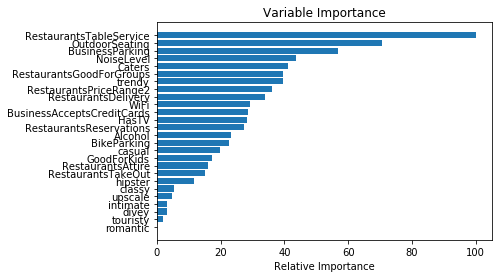

In [259]:
#important features
import numpy as np
import matplotlib.pyplot as plt
feature_importance = clf.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

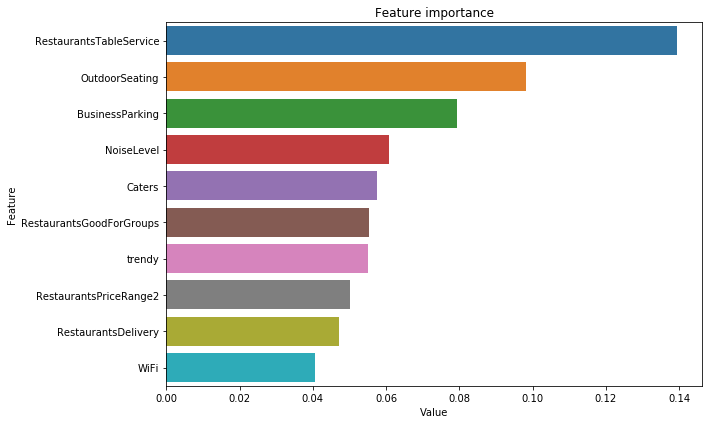

In [260]:
import seaborn as sns
import matplotlib.pyplot as plt
cols = list(X.columns)
feature_importance = pd.DataFrame(sorted(zip(clf.feature_importances_, cols)), columns=['Value','Feature'])

plt.figure(figsize=(10, 6))
sns.barplot(x="Value", y="Feature", data=feature_importance.sort_values(by="Value", ascending=False)[:10])
plt.title('Feature importance')
plt.tight_layout()

In [264]:
#label of RestaurantsTableService
data = pd.read_csv('attribute.csv')

1    2644
2    1163
0     465
Name: RestaurantsTableService, dtype: int64

In [288]:
data.RestaurantsPriceRange2.value_counts()

1    2139
0    1682
4     291
2     149
3      11
Name: RestaurantsPriceRange2, dtype: int64

In [290]:
feature.RestaurantsPriceRange2.value_counts()

2       2139
1       1682
None     291
3        149
4         11
Name: RestaurantsPriceRange2, dtype: int64